In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
#visualising Raw Data
raw=pd.read_csv("vehicles.csv")
raw.info()
raw.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

id                                                url  \
count   4.238570e+05                                             423857   
unique           NaN                                             423857   
top              NaN  https://anchorage.craigslist.org/cto/d/anchora...   
freq             NaN                                                  1   
mean    7.190602e+09                                                NaN   
std     5.159269e+06                                                NaN   
min     7.178302e+09                                                NaN   
25%     7.186688e+09                                                NaN   
50%     7.192068e+09                                                NaN   
75%     7.194909e+09                                                NaN   
max     7.197006e+09                                                NaN   

          region                    region_url         price           year  \
count     423857                        423857  4.238570e+05  328743.000000   
unique       404                           413           NaN            NaN   
top     columbus  https://salem.craigslist.org           NaN            NaN   
freq        3296                          2985           NaN            NaN   
mean         NaN                           NaN  5.779437e+04    2009.827358   
std          NaN                           NaN  1.002581e+07      10.135809   
min          NaN                           NaN  0.000000e+00    1900.000000   
25%          NaN                           NaN  4.499000e+03    2007.000000   
50%          NaN                           NaN  9.995000e+03    2012.000000   
75%          NaN                           NaN  1.899500e+04    2016.000000   
max          NaN                           NaN  3.808256e+09    2021.000000   

       manufacturer   model  condition    cylinders  ...   drive       size  \
count        313242  325384     176719       197679  ...  231119     102627   
unique           43   27042          6            8  ...       3          4   
top            ford   f-150  excellent  6 cylinders  ...     4wd  full-size   
freq          59786    6073      85254        70130  ...   99347      52820   
mean            NaN     NaN        NaN          NaN  ...     NaN        NaN   
std             NaN     NaN        NaN          NaN  ...     NaN        NaN   
min             NaN     NaN        NaN          NaN  ...     NaN        NaN   
25%             NaN     NaN        NaN          NaN  ...     NaN        NaN   
50%             NaN     NaN        NaN          NaN  ...     NaN        NaN   
75%             NaN     NaN        NaN          NaN  ...     NaN        NaN   
max             NaN     NaN        NaN          NaN  ...     NaN        NaN   

          type paint_color                                          image_url  \
count   241157      222203                                             329661   
unique      13          12                                             222413   
top      sedan       white  https://images.craigslist.org/00H0H_lwWjXSEWNa...   
freq     64842       57646                                               2106   
mean       NaN         NaN                                                NaN   
std        NaN         NaN                                                NaN   
min        NaN         NaN                                                NaN   
25%        NaN         NaN                                                NaN   
50%        NaN         NaN                                                NaN   
75%        NaN         NaN                                                NaN   
max        NaN         NaN                                                NaN   

                                              description county   state  \
count                                              329654    0.0  423857   
unique                                             275765    NaN      51   
top     VISIT OUR 

In [3]:
# reading cvs file and removing nan values that are other than the normal format


missing_value_formats = ["n.a.","?","NA","n/a", "na", "--","nan"]
df = pd.read_csv("vehicles.csv", na_values = missing_value_formats)

In [4]:
# dropping useless columns
#County column was all NAN
#Description not needed for predictions or analysis
#region column was removed because we have the state and longitude and longitude
#Urls were removed becuase they were outdated and non functional

# removing county because all rows were NaN 
# dropping all rows that have atleast one nan value

df1 = df.drop(columns=["url","region_url","image_url","description","county","paint_color", "region","size","vin","transmission"],axis=1)
df1.dropna(axis=0, inplace=True)
#df1

In [5]:
#removing duplicates
df1=df1[df1.duplicated(subset=["price","year","manufacturer","model","condition","cylinders","fuel","odometer","title_status","drive","type","state"],keep= "first")==False]
df1

id  price    year manufacturer                  model  \
4       7184712241  16995  2007.0          gmc  sierra classic 2500hd   
5       7184711787  13995  2012.0         ford                  f-150   
6       7184710887   7995  2010.0    chevrolet                equinox   
7       7184710023   8995  2011.0    chevrolet               traverse   
8       7184709156  10995  2014.0         ford               explorer   
...            ...    ...     ...          ...                    ...   
423850  7195116716    750  2002.0       saturn                    sc2   
423851  7195116656   4800  2002.0         ford       mustang gt coupe   
423852  7184919761   1600  2006.0      hyundai                 sonata   
423853  7184844576   9000  2003.0       toyota        sequoia limited   
423855  7184791927   3800  1999.0      lincoln               town car   

        condition    cylinders    fuel  odometer title_status drive   type  \
4            good  8 cylinders  diesel  254217.0        clean   4wd  truck   
5            good  6 cylinders     gas  188406.0        clean   4wd  truck   
6            good  4 cylinders     gas  108124.0        clean   4wd    SUV   
7            good  6 cylinders     gas  178054.0        clean   4wd    SUV   
8            good  6 cylinders     gas  170259.0        clean   4wd    SUV   
...           ...          ...     ...       ...          ...   ...    ...   
423850    salvage  4 cylinders     gas   40000.0      missing   fwd  coupe   
423851       good  6 cylinders     gas   58000.0        clean   rwd  coupe   
423852       fair  6 cylinders     gas  159980.0        clean   fwd  sedan   
423853  excellent  8 cylinders     gas  160000.0        clean   4wd    SUV   
423855  excellent  8 cylinders     gas  160000.0        clean   rwd  sedan   

       state      lat      long  
4         mn  45.6836  -92.9648  
5         mn  45.6836  -92.9648  
6         mn  45.6836  -92.9648  
7         mn  45.6836  -92.9648  
8         mn  45.6836  -92.9648  
...      ...      ...       ...  
423850    nm  35.1374 -106.6380  
423851    nm  34.8543 -106.6960  
423852    mn  46.8348  -92.0742  
423853    mn  46.9369  -91.9325  
423855    mn  46.8433  -92.2550  

[76795 rows x 15 columns]

In [10]:
# checking to see if all the ids are unique


print(len(df1['id'].unique())) #all ids are unique  // checked


76795


In [6]:
#renaming columns to make the names more concise


df1 = df1.rename(columns={ "title_status": "status"})

In [7]:
# changing the type of the year and making it int from float


df1['year']=df1['year'].astype('int64')
df1['year'].dtypes
df1

id  price  year manufacturer                  model  \
4       7184712241  16995  2007          gmc  sierra classic 2500hd   
5       7184711787  13995  2012         ford                  f-150   
6       7184710887   7995  2010    chevrolet                equinox   
7       7184710023   8995  2011    chevrolet               traverse   
8       7184709156  10995  2014         ford               explorer   
...            ...    ...   ...          ...                    ...   
423850  7195116716    750  2002       saturn                    sc2   
423851  7195116656   4800  2002         ford       mustang gt coupe   
423852  7184919761   1600  2006      hyundai                 sonata   
423853  7184844576   9000  2003       toyota        sequoia limited   
423855  7184791927   3800  1999      lincoln               town car   

        condition    cylinders    fuel  odometer   status drive   type state  \
4            good  8 cylinders  diesel  254217.0    clean   4wd  truck    mn   
5            good  6 cylinders     gas  188406.0    clean   4wd  truck    mn   
6            good  4 cylinders     gas  108124.0    clean   4wd    SUV    mn   
7            good  6 cylinders     gas  178054.0    clean   4wd    SUV    mn   
8            good  6 cylinders     gas  170259.0    clean   4wd    SUV    mn   
...           ...          ...     ...       ...      ...   ...    ...   ...   
423850    salvage  4 cylinders     gas   40000.0  missing   fwd  coupe    nm   
423851       good  6 cylinders     gas   58000.0    clean   rwd  coupe    nm   
423852       fair  6 cylinders     gas  159980.0    clean   fwd  sedan    mn   
423853  excellent  8 cylinders     gas  160000.0    clean   4wd    SUV    mn   
423855  excellent  8 cylinders     gas  160000.0    clean   rwd  sedan    mn   

            lat      long  
4       45.6836  -92.9648  
5       45.6836  -92.9648  
6       45.6836  -92.9648  
7       45.6836  -92.9648  
8       45.6836  -92.9648  
...         ...       ...  
423850  35.1374 -106.6380  
423851  34.8543 -106.6960  
423852  46.8348  -92.0742  
423853  46.9369  -91.9325  
423855  46.8433  -92.2550  

[76795 rows x 15 columns]

In [8]:
# printing unique values of each column for your viewing pleasure :)
# 

cols = df1.columns.values
for i in cols:
    print(i)
    print(df1[i].unique())
    print('\n')
    


id
[7184712241 7184711787 7184710887 ... 7184919761 7184844576 7184791927]


price
[16995 13995  7995 ... 25871  9584 14583]


year
[2007 2012 2010 2011 2014 2004 2009 2008 1994 2003 2015 2016 2006 2017
 2013 2005 1964 2019 2002 2018 1989 2000 1990 1967 1998 1992 1995 2001
 1997 1996 1963 1999 2020 1966 1983 1979 1960 1981 1986 1991 1959 1993
 1982 1988 1987 1969 1934 1980 1985 1970 1974 1971 1984 1968 1978 1972
 2021 1965 1941 1939 1948 1940 1975 1957 1962 1950 1976 1958 1932 1973
 1955 1956 1927 1977 1951 1953 1930 1923 1931 1954 1961 1952 1933 1949
 1936 1947 1946 1937 1929 1935 1926 1928 1924 1938 1942]


manufacturer
['gmc' 'ford' 'chevrolet' 'ram' 'buick' 'subaru' 'nissan' 'hyundai'
 'dodge' 'rover' 'toyota' 'lexus' 'cadillac' 'bmw' 'audi' 'volvo' 'jaguar'
 'chrysler' 'jeep' 'acura' 'kia' 'honda' 'volkswagen' 'pontiac' 'lincoln'
 'mazda' 'infiniti' 'mercedes-benz' 'saturn' 'ferrari' 'mercury' 'mini'
 'mitsubishi' 'tesla' 'fiat' 'land rover' 'harley-davidson' 'morgan'
 'datsun' 'a

In [9]:
# make numeric columns for the string columns to find correlations. using the unique values created above to do that
df1.replace(['good' ,'fair' ,'excellent' ,'like new' ,'salvage' ,'new'], [2,1,3, 4, 0, 5], inplace=True)
df1.replace(['8 cylinders' ,'6 cylinders' ,'4 cylinders' ,'5 cylinders' ,'10 cylinders' ,'other' ,'3 cylinders', '12 cylinders'], [8,6,4, 5, 10,0,3,12], inplace=True)
#condtion changed to 0 to 5 scale. 
df1.shape
df1.info()
df1.describe()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76795 entries, 4 to 423855
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            76795 non-null  int64  
 1   price         76795 non-null  int64  
 2   year          76795 non-null  int64  
 3   manufacturer  76795 non-null  object 
 4   model         76795 non-null  object 
 5   condition     76795 non-null  int64  
 6   cylinders     76795 non-null  int64  
 7   fuel          76795 non-null  object 
 8   odometer      76795 non-null  float64
 9   status        76795 non-null  object 
 10  drive         76795 non-null  object 
 11  type          76795 non-null  object 
 12  state         76795 non-null  object 
 13  lat           76795 non-null  float64
 14  long          76795 non-null  float64
dtypes: float64(3), int64(5), object(7)
memory usage: 9.4+ MB


id  price  year manufacturer                  model  condition  \
4  7184712241  16995  2007          gmc  sierra classic 2500hd          2   
5  7184711787  13995  2012         ford                  f-150          2   
6  7184710887   7995  2010    chevrolet                equinox          2   
7  7184710023   8995  2011    chevrolet               traverse          2   
8  7184709156  10995  2014         ford               explorer          2   

   cylinders    fuel  odometer status drive   type state      lat     long  
4          8  diesel  254217.0  clean   4wd  truck    mn  45.6836 -92.9648  
5          6     gas  188406.0  clean   4wd  truck    mn  45.6836 -92.9648  
6          4     gas  108124.0  clean   4wd    SUV    mn  45.6836 -92.9648  
7          6     gas  178054.0  clean   4wd    SUV    mn  45.6836 -92.9648  
8          6     gas  170259.0  clean   4wd    SUV    mn  45.6836 -92.9648

In [10]:
df1.describe(include=[np.number, pd.Categorical]).T

count unique    top   freq         mean          std  \
id            76795    NaN    NaN    NaN  7.18917e+09  4.72666e+06   
price         76795    NaN    NaN    NaN      46305.6  8.99822e+06   
year          76795    NaN    NaN    NaN      2008.86      8.84167   
manufacturer  76795     42   ford  14020          NaN          NaN   
model         76795  10488  f-150   1158          NaN          NaN   
condition     76795    NaN    NaN    NaN      2.65985     0.754759   
cylinders     76795    NaN    NaN    NaN      5.83436      1.62636   
fuel          76795      5    gas  70907          NaN          NaN   
odometer      76795    NaN    NaN    NaN       114458       126454   
status        76795      6  clean  72377          NaN          NaN   
drive         76795      3    4wd  30541          NaN          NaN   
type          76795     13  sedan  21668          NaN          NaN   
state         76795     51     ca   5404          NaN          NaN   
lat           76795    NaN    NaN    NaN      38.6823      5.46611   
long          76795    NaN    NaN    NaN     -90.9614      16.4566   

                     min          25%          50%          75%          max  
id            7.1783e+09  7.18562e+09  7.19014e+09  7.19341e+09  7.19523e+09  
price                  0         4800         8950        15999  2.49053e+09  
year                1923         2006         2010         2014         2021  
manufacturer         NaN          NaN          NaN          NaN          NaN  
model                NaN          NaN          NaN          NaN          NaN  
condition              0            2            3            3            5  
cylinders              0            4            6            8           12  
fuel                 NaN          NaN          NaN          NaN          NaN  
odometer               0        63200       108000       153000        1e+07  
status               NaN          NaN          NaN          NaN          NaN  
drive                NaN          NaN          NaN          NaN          NaN  
type                 NaN          NaN          NaN          NaN          NaN  
state                NaN          NaN          NaN          NaN          NaN  
lat              -56.527       35.172        39.55      42.3297      65.7436  
long            -161.394     -97.1606      -85.851     -79.9265      94.1632

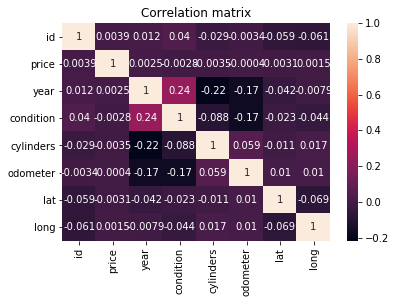

In [11]:
matrix=df1.corr()
mapp=sns.heatmap(matrix, annot=True)
mapp.set_title("Correlation matrix")
corr = df.corr(method = 'pearson')

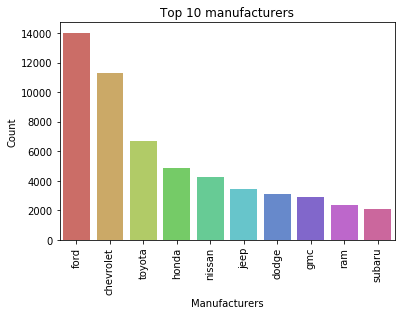

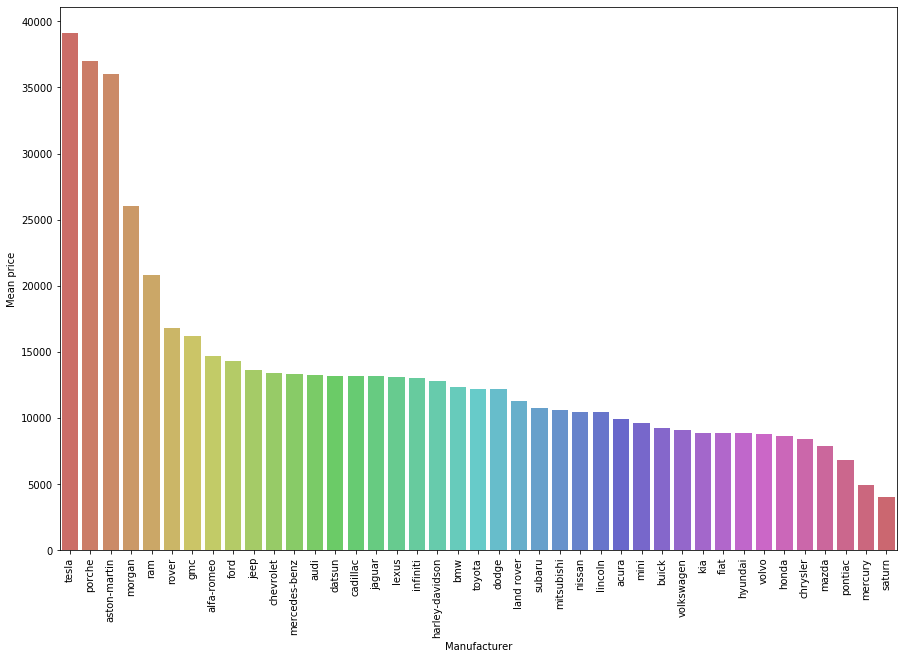

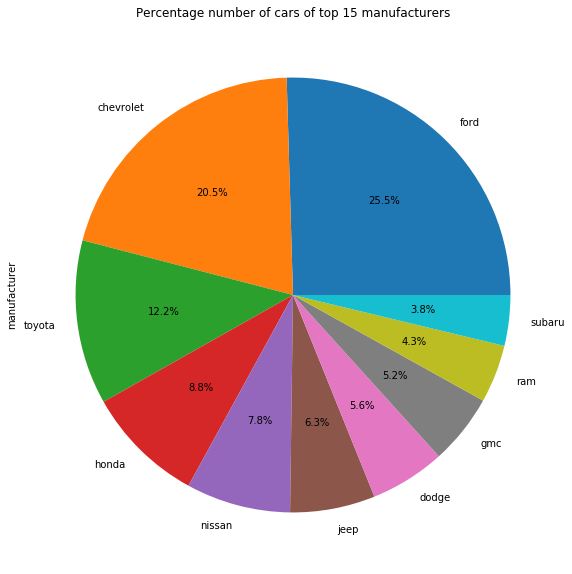

In [12]:

top_10= df1['manufacturer'].value_counts().iloc[:10]
a=top_10.index
top_10
top_10 = pd.DataFrame({'manufacturer': top_10.index, 'count': top_10.values})
top=sns.barplot(x = 'manufacturer', y = 'count', data = top_10,
              palette = 'hls'
                     )
top.set(xlabel='Manufacturers', ylabel='Count')
plt.xticks(rotation=90)
top.set_title("Top 10 manufacturers")

q_low = df1["price"].quantile(0.05)
q_hi  = df1["price"].quantile(0.99)
df2 = df1[(df1["price"] < q_hi) & (df1["price"] > q_low)]

group= df2.groupby('manufacturer')['price'].mean()
x=group.index
y=group.values
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
final=pd.DataFrame({'Manufacturer':x, 'Price':y})

final=pd.pivot_table(final, index= ['Manufacturer'], values= "Price", aggfunc= 'mean', fill_value= 0)
final.reset_index(inplace=True)
final = final.sort_values(by ='Price',ascending=False )

graph=sns.barplot(x = 'Manufacturer', y = 'Price', ax=ax, data = final,
            palette = 'hls'             
            )
plt.xticks(rotation=90)
graph.set(xlabel='Manufacturer', ylabel='Mean price')
plt.show()


df1["manufacturer"].value_counts().iloc[:10].plot.pie( subplots=True, figsize=(10, 10),autopct='%1.1f%%')
plt.title("Percentage number of cars of top 15 manufacturers")
plt.show()






In [17]:
#Graphically visuallising the position of 10 percent of data set
df_temp=df1
df_temp['text']=df1[0:10000]['manufacturer']+" "+df1[0:10000]['model']+" "+df1[0:10000]['price'].astype(str)+"$"
fig = go.Figure(data=go.Scattergeo(
        lon = df1[0:10000]['long'],# you can change size of dataset to plot
        lat = df1[0:10000]['lat'],# you can change size of dataset to plot
        text = df_temp['text'],
        mode = 'markers',
        ))

fig.update_layout(
        title = 'Graphical positon of 10000 Used cars showing their manufacturer , model and price',
        geo_scope='usa',
    )
fig.show()


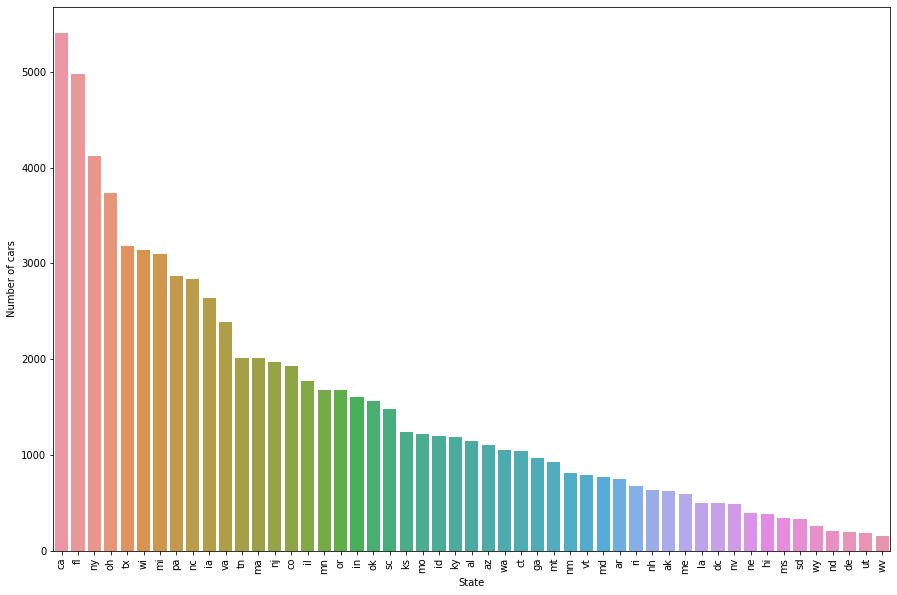

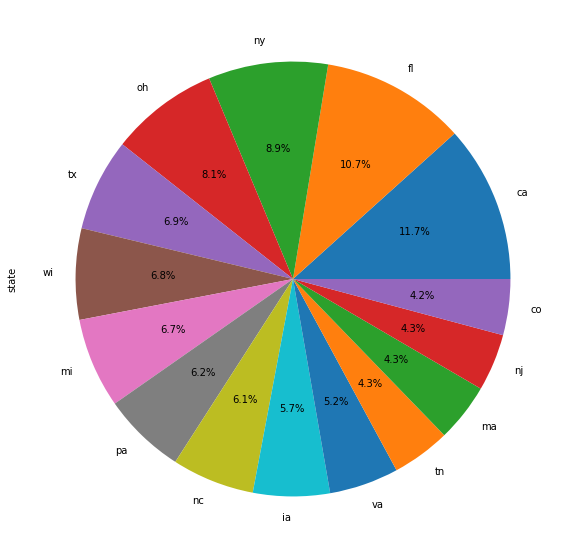

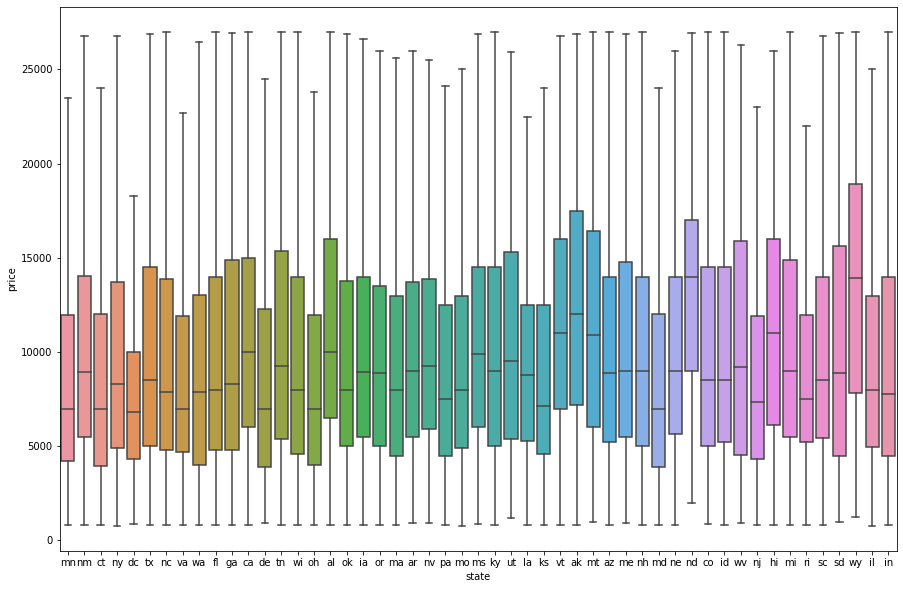

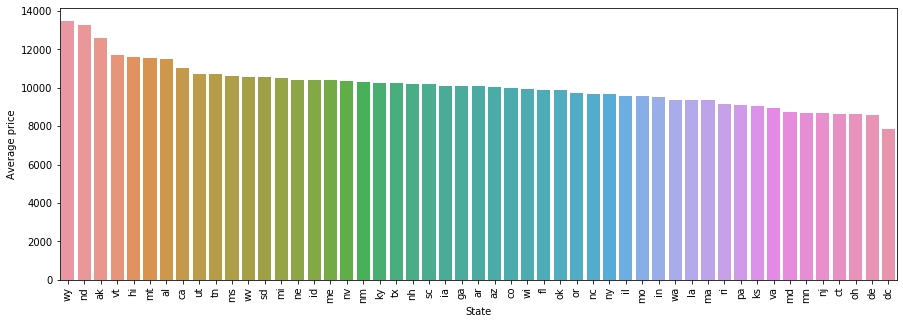

In [24]:

group1= df1
group1=group1.groupby('state')['condition'].count()
group1.index
group1.values
condition=pd.DataFrame({'State':group1.index, 'Number of cars':group1.values})
condition = condition.sort_values(by ='Number of cars',ascending=False )
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'State', y = 'Number of cars', data = condition)

plt.xticks(rotation=90)
plt.show()

plt.show()
df1["state"].value_counts().iloc[:15].plot.pie( subplots=True, figsize=(10, 10),autopct='%1.1f%%')
plt.show()

q_low = df1["price"].quantile(0.05)
q_hi  = df1["price"].quantile(0.9)
df2 = df1[(df1["price"] < q_hi) & (df1["price"] > q_low)]

plt.figure(figsize=(15,10))
sns.boxplot(y='price', x='state', data=df2, showfliers=False)
plt.show()


fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
final=pd.DataFrame({'State':df2.state, 'Price':df2.price})

final=pd.pivot_table(final, index= ['State'], values= "Price", aggfunc= 'mean', fill_value= 0)
final.reset_index(inplace=True)
final = final.sort_values(by ='Price',ascending=False )

graph=sns.barplot(x = 'State', y = 'Price', data = final           
            )
plt.xticks(rotation=90)
graph.set(xlabel='State', ylabel='Average price')






plt.show()


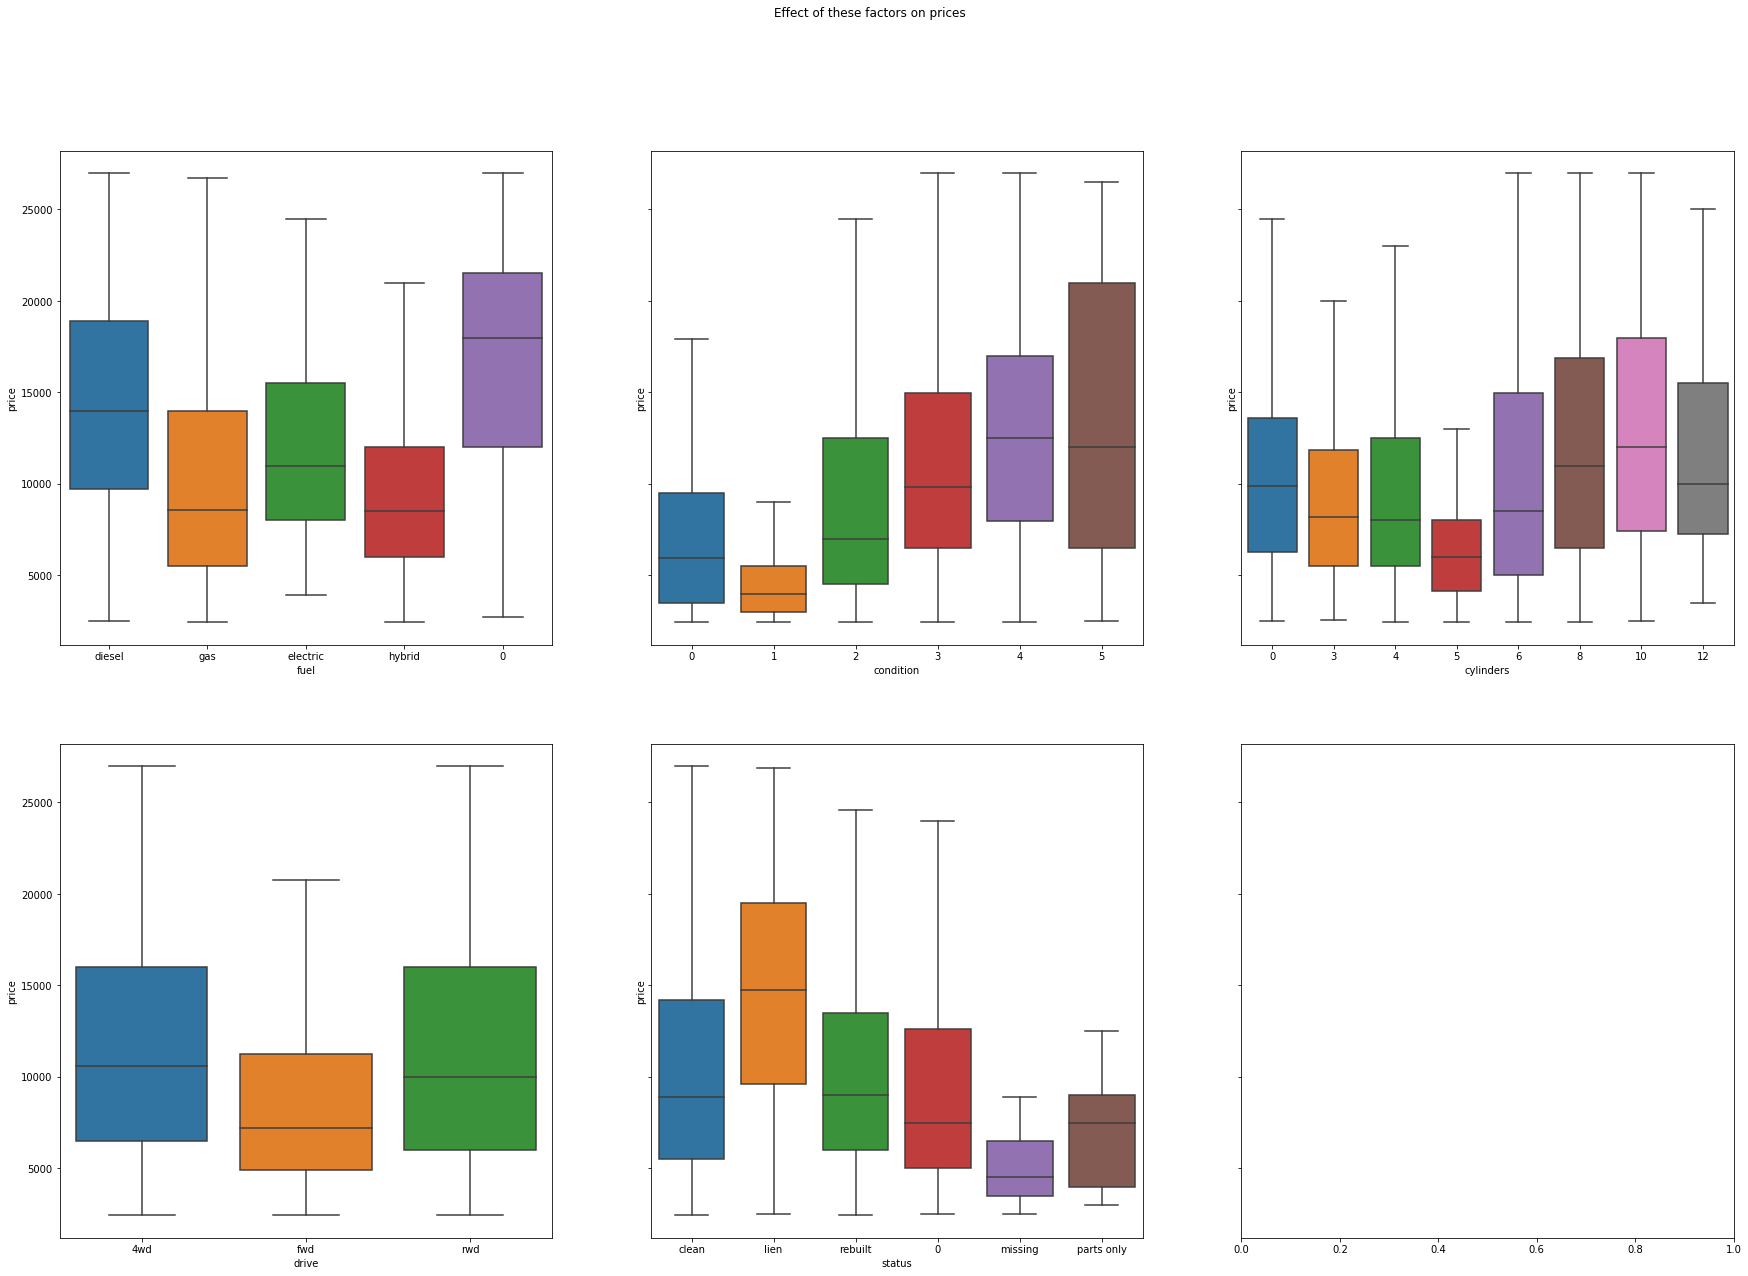

Text(0, 0.5, 'Count')

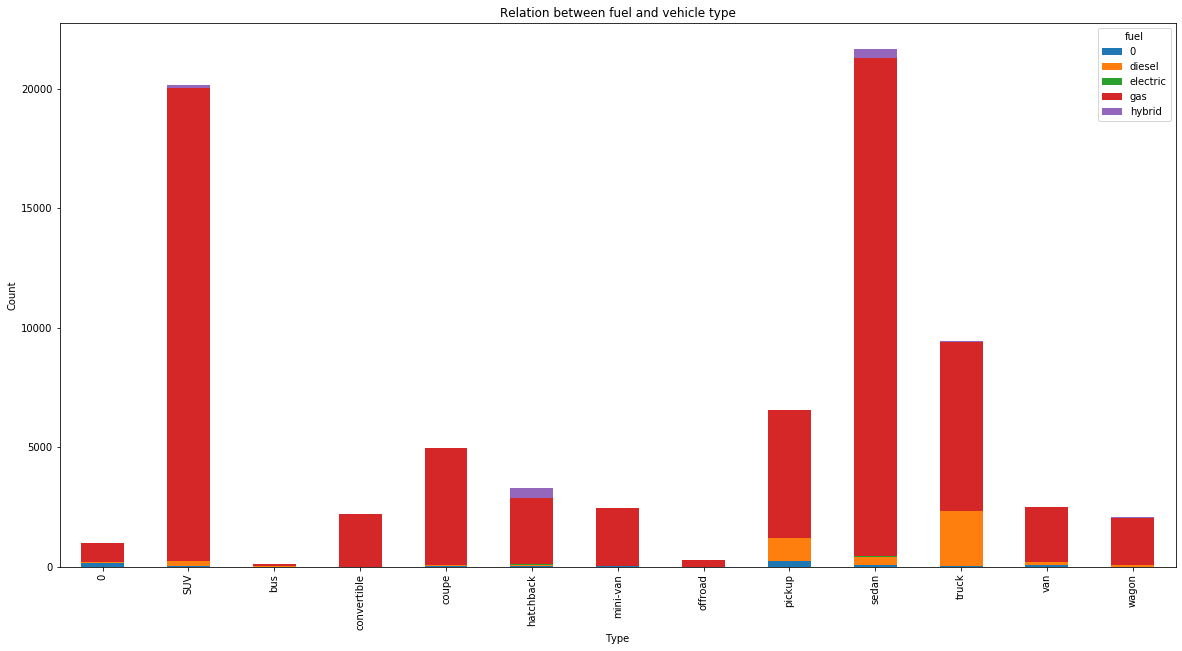

In [19]:
q_low = df1["price"].quantile(0.1)
q_hi  = df1["price"].quantile(0.9)
df2 = df1[(df1["price"] < q_hi) & (df1["price"] > q_low)]

fig, axes = plt.subplots(2, 3, figsize=(30,20), sharey=True)
fig.suptitle('Effect of these factors on prices')
graph1=sns.boxplot(x="fuel", y="price", data=df2,showfliers=False,ax=axes[0, 0])
graph2=sns.boxplot(x="condition", y="price", data=df2,showfliers=False,ax=axes[0, 1])
graph3=sns.boxplot(x="drive", y="price", data=df2,showfliers=False,ax=axes[1, 0])
graph4=sns.boxplot(x="status", y="price", data=df2,showfliers=False,ax=axes[1, 1])
graph5=sns.boxplot(x="cylinders", y="price", data=df2,showfliers=False,ax=axes[0,2])

plt.show()
#Car's labbeled as fair are priced almost same as those labelled salvaaged


plotdata=pd.pivot_table(df1, index= ['type'],columns=['fuel'], values= "price", aggfunc= 'count', fill_value= 0)
plotdata.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Relation between fuel and vehicle type")
plt.xlabel("Type")
plt.ylabel("Count")
#Diesel cars are priced high because a large number of them are trucks and pickup which usually are expensive
#mostly gas is used
#electric cars are very few, relate high price of electric cars here to tesla's high price from the manufacturer
#section

D:\Anaconda3\envs\CS331\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



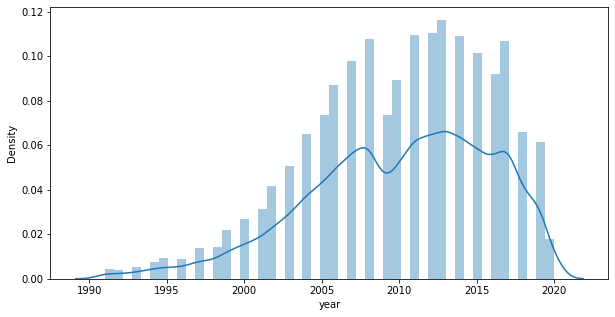

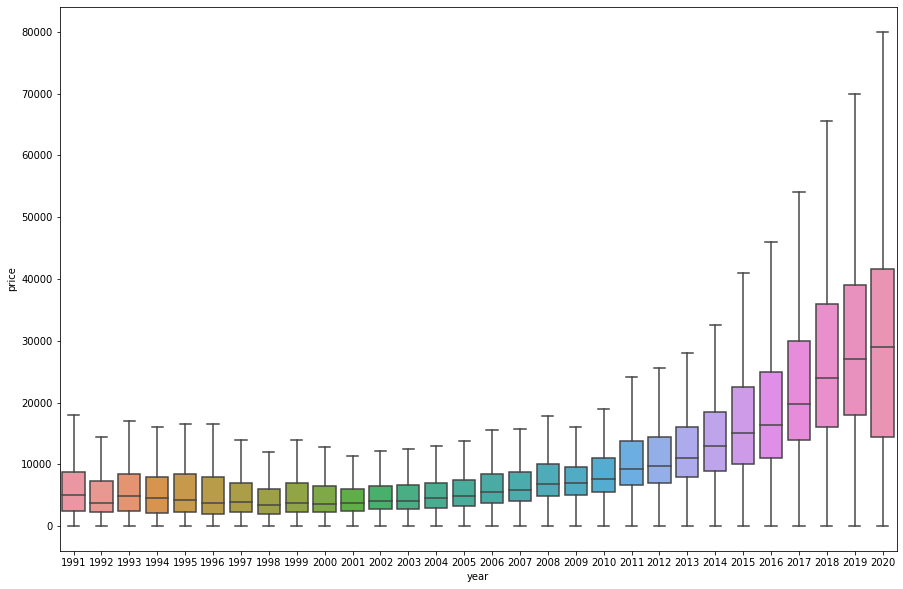

No handles with labels found to put in legend.


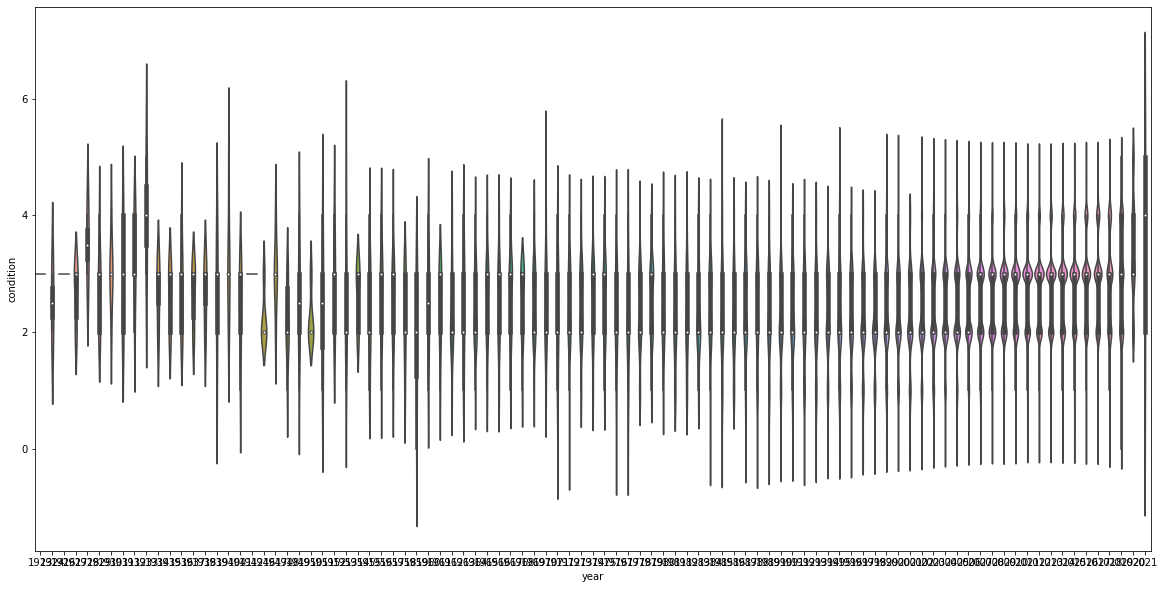

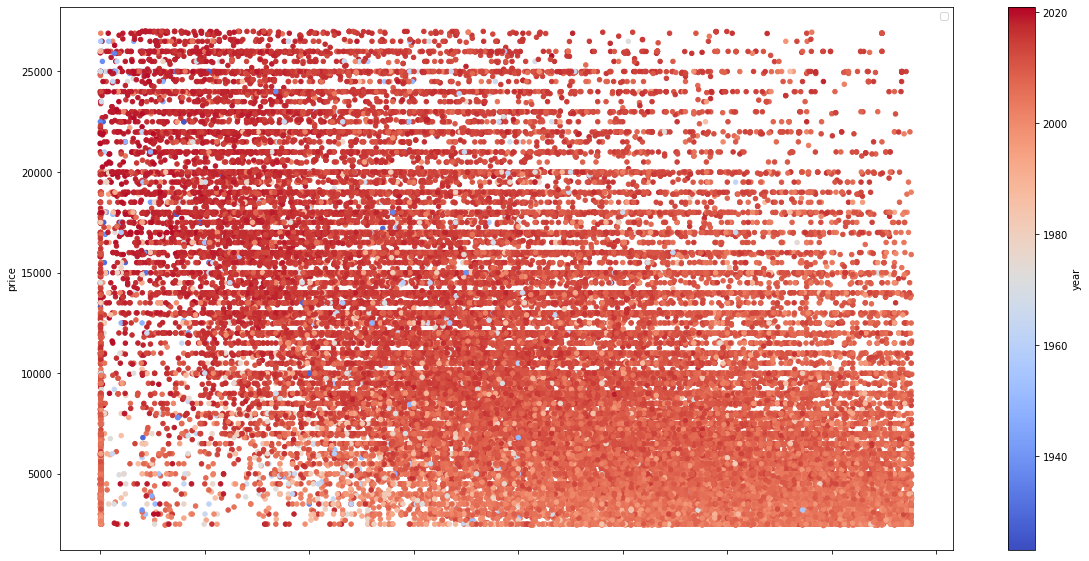

In [30]:
df1["year"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.distplot(df1[(df1["year"]>1990) & (df1["year"]<2021)]["year"])
plt.show()

# A decrease in trend in car trend in 2009 show that fewer cars were manufactured in 2009 which can be due to the 2009
# financial crisis, the decrease from 2014 onwards can be attributed to temporal proximity to the date the data was 
# collected on as the cars are already newer users are less likely to sale them this is confirmed by the steep decrease
# from 2015 onwards

plt.figure(figsize=(15,10))

sns.boxplot(y='price', x=df1[(df1["year"] > 1990) & (df1["year"]<2021) ]["year"], data=df1, showfliers=False)
plt.show()
#rise in average vehicle price and price range can be observed

plt.figure(figsize=(20,10))
sns.violinplot(x = 'year', y='condition', data=df1)

#Cars condition gets better as we move to newer model, this explains the rise in graph above as poorer condition leads
#to lower price


q_low = df1["odometer"].quantile(0)
#It is kept zero as increasing it will exclude the new vehicles
q_hi  = df1["odometer"].quantile(0.9)
df2 = df1[(df1["odometer"] < q_hi) & (df1["odometer"] > q_low)]
q_low = df1["price"].quantile(0.1)
q_hi  = df1["price"].quantile(0.9)
df2 = df2[(df2["price"] < q_hi) & (df2["price"] > q_low)]


df2.plot.scatter(x="odometer", y='price', c='year', colormap="coolwarm", figsize=(20,10))
plt.show()

# The plot shows a relation between odometer reading and the price of the vehicle. A decreasing trend can be observed.
# The plot also shows the relation of manufacturing year with price and odometer reading as the plot get lighter 
# towards the bottom and right showing that older cars sell for a lower price and have travelled more. Also left side
# of the graph is less dense showing that there are fewer number of newer car models 
